In [1]:
import gzip
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:

fontsize = 18
def hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    plt.figure(figsize=(8, 6))
    #bins = np.linspace(0, max(np.max(x1),np.max(x2)), 50) if predefined_bins else 'auto'
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    errors1 = np.sqrt(n1)
    if not density: plt.errorbar(bin_centers, n1, yerr=errors1, color='orange',fmt='none')
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    errors2 = np.sqrt(n2)
    if not density: plt.errorbar(bin_centers, n2, yerr=errors2, color='blue',fmt='none')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)




def hist2d(x, x_fs, fontsize=12):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)
    fig.tight_layout()

    # First histogram (Enriched Sample)
    h1, xedges, yedges, im1 = axes[0].hist2d(*x, bins=50, cmap='viridis', norm=LogNorm(), density=False)
    axes[0].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[0].set_ylabel('$P_t$ [GeV]', fontsize=fontsize)
    axes[0].set_title('Enriched Sample', fontsize=fontsize)
    cbar1 = fig.colorbar(im1, ax=axes[0], label='Density')

    # Second histogram (Full Sample)
    h2, _, _, im2 = axes[1].hist2d(*x_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm(), density=False)
    axes[1].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[1].set_title('Full Sample', fontsize=fontsize)
    cbar2 = fig.colorbar(im2, ax=axes[1], label='Density')

    # Adjust tick parameters
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=fontsize)

    plt.show()

def difference_hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    diff = n1-n2
    plt.close()
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers for plotting

    plt.figure(figsize=(8, 6))
    plt.bar(bin_centers, diff, width=np.diff(bins), color='blue', edgecolor='black', alpha=0.7)

    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


In [3]:
def extract_number_from_string(s):
    number_str = ''
    for char in s:
        if char.isdigit(): 
            number_str += char
    return int(number_str)

In [4]:
folder = "/home/hep/lprate/projects/MuonsAndMatter/data/outputs/optim_8"
data = []
for file_name in os.listdir(folder):
    print(file_name)
    data.append(np.load(os.path.join(folder,file_name)))
data = np.concatenate(data,axis=1)


ns = [extract_number_from_string(file_name) for file_name in os.listdir(folder)]
data_input = []
for file_name in os.listdir('../full_sample'):
    n_name = extract_number_from_string(file_name)
    if n_name not in ns: continue
    print(file_name)
    with gzip.open(f'../full_sample/{file_name}', 'rb') as f:
        data_input.append(pickle.load(f))
assert len(data_input) == len(ns)
data_input = np.concatenate(data_input)
print(data_input.shape)

muonsdata_60000.npy
muonsdata_37000.npy
muonsdata_41000.npy
muonsdata_32000.npy
muonsdata_57000.npy
muonsdata_48000.npy
muonsdata_44000.npy
full_sample_44000.pkl
full_sample_57000.pkl
full_sample_41000.pkl
full_sample_48000.pkl
full_sample_37000.pkl
full_sample_32000.pkl
full_sample_60000.pkl
(46546723, 8)


In [5]:
px,py,pz,x,y,z,pdg,W = data
pt = np.sqrt(px**2+py**2)
p = np.sqrt(px**2+py**2+pz**2)

sens_plane = (np.abs(x)<2) & (np.abs(y)<3) & (np.abs(pdg)==13)
px_sens, py_sens, pz_sens, x_sens, y_sens, z_sens, pdg_sens, W_sens = px[sens_plane], py[sens_plane], pz[sens_plane], x[sens_plane], y[sens_plane], z[sens_plane], pdg[sens_plane], W[sens_plane]
pt_sens = np.sqrt(px_sens**2+py_sens**2)
p_sens = np.sqrt(px_sens**2+py_sens**2+pz_sens**2)

In [6]:
W_sens.sum()

31739.32

In [7]:
def project(x,y,px,py,pz,dist):
    return x+px*dist/pz, y+py*dist/pz
x_projected, y_projected = project(x_sens,y_sens,px_sens,py_sens,pz_sens,10)
mask_t4 = (x_projected>-2) & (x_projected<2) & (y_projected>-3) & (y_projected<3)
W_projected = W_sens[mask_t4]
p_projected = p_sens[mask_t4]

In [8]:
inputs = data_input[:,-1].sum()
print('inputs:', inputs)
total_inputs = 18E9
hits = W_sens.sum()
hits_filter = W_sens[p_sens>5].sum()
hits_t4 = (W_projected).sum()
rate = hits/inputs
rate_filter = hits_filter/inputs
rate_t4 = hits_t4/inputs

print(f'rate without weights: {len(W_sens)/len(data_input)}, p>5: {len(W_sens[p_sens>5])/len(data_input)}')
print(f"Total hits: {hits}, hits with p>5: {hits_filter}")
print(f"Rate: {rate}, rate with p>5: {rate_filter}")
print(f"Rate T4: {rate_t4}")


inputs: 1656193632.8151402
rate without weights: 1.950728088849563e-05, p>5: 1.39644631911037e-06
Total hits: 31739.3203125, hits with p>5: 1260.75
Rate: 1.9164015416814887e-05, rate with p>5: 7.612334542411089e-07
Rate T4: 1.064992848693601e-05


In [9]:
print(f"Rate T1: {rate*total_inputs}, rate T1 with p>5: {rate_filter*total_inputs}, rate T4: {rate_t4*total_inputs}")

Rate T1: 344952.277502668, rate T1 with p>5: 13702.20217633996, rate T4: 191698.71276484817


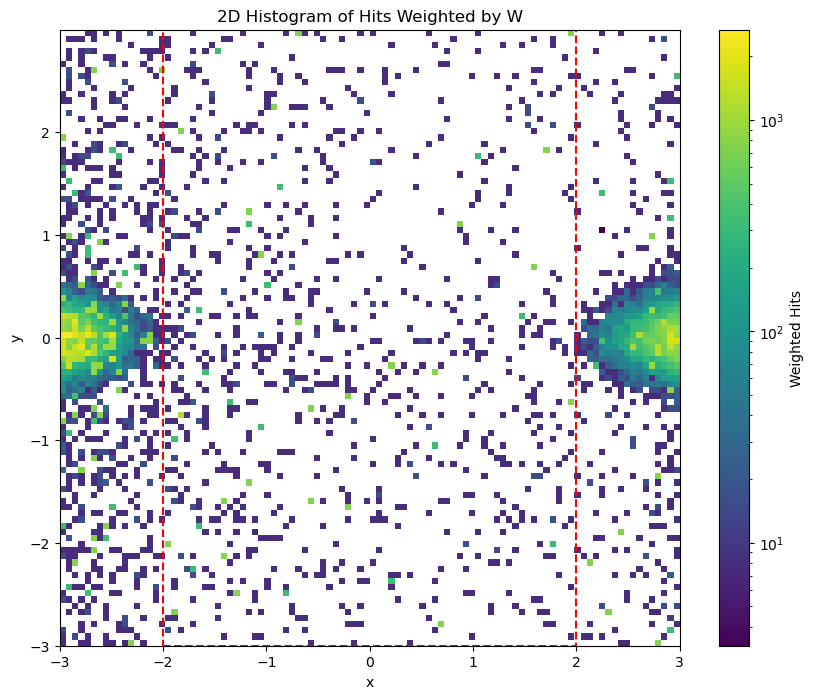

In [10]:
plt.figure(figsize=(10, 8))
plt.hist2d(x, y, bins=100, weights=W, cmap='viridis', norm=LogNorm())
plt.colorbar(label='Weighted Hits')
plt.plot([-2, 2, 2, -2, -2], [-3, -3, 3, 3, -3], color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Histogram of Hits Weighted by W')
plt.show()

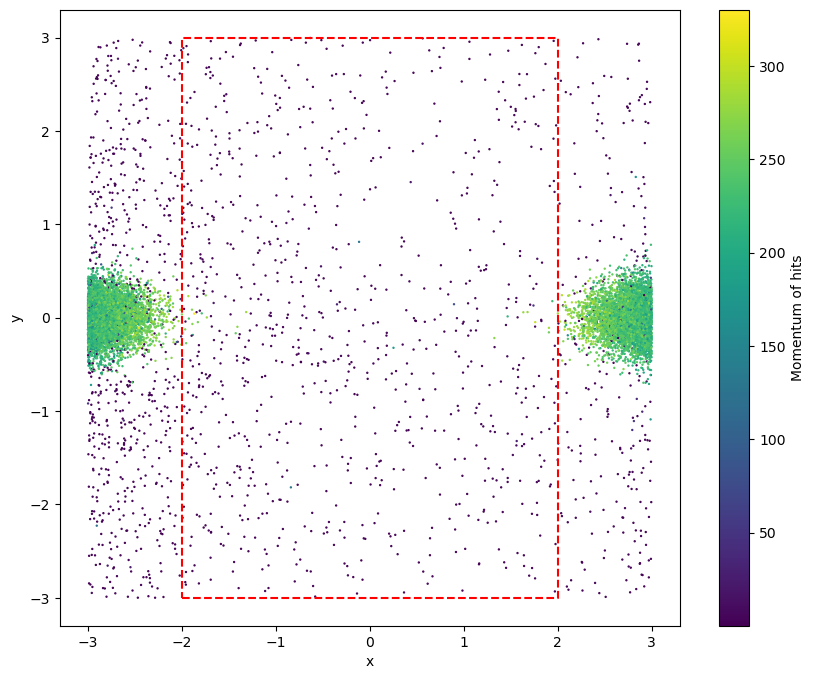

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(x[(np.abs(pdg)==13)], y[(np.abs(pdg)==13)], s = 0.5, c=p[(np.abs(pdg)==13)], cmap='viridis')
plt.colorbar(label='Momentum of hits')
plt.plot([-2, 2, 2, -2, -2], [-3, -3, 3, 3, -3], color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Text(0.5, 0, 'Momentum [GeV]')

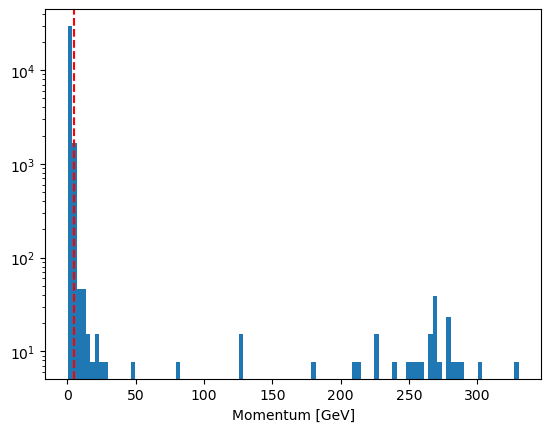

In [12]:
plt.hist(p_sens, bins=100,  label='All hits', log = True, weights= W_sens)
plt.axvline(5, color='red', linestyle='--')
plt.xlabel('Momentum [GeV]')